# Characterizing a Distribution by PMF, PDF, and CDF
**Author:** Ian He | **Date:** Jul 24, 2023 | **Python Version:** 3.11

In [1]:
import numpy as np               # for numerical methods
import pandas as pd              # for data handling
import scipy.stats as stats      # for distribution functions
import statsmodels.api as sm     # for kernel density
import matplotlib.pyplot as plt  # for plotting

## Probability Mass Function
We're going to plot the PMF of a discrete random variable $X \sim Poisson(5)$. The PMF is of the form
$$f_X(x) = \frac{5^x e^{-5}}{x!} \quad \forall x \in \{0, 1, 2, ...\}$$

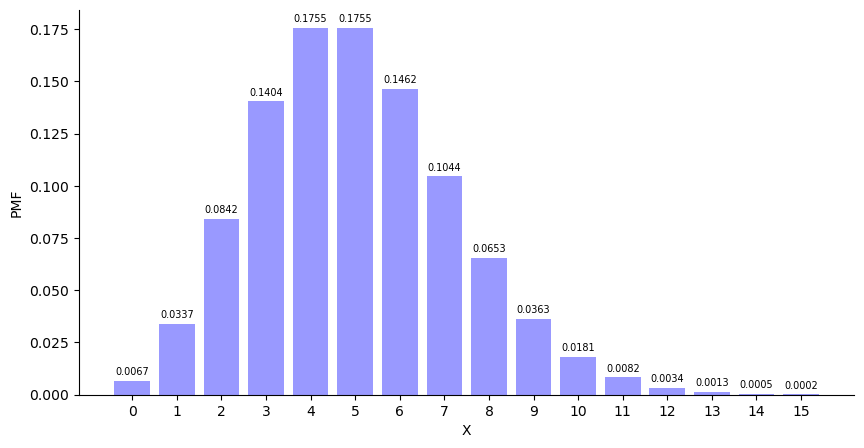

In [2]:
x_range = range(0, 16)    # the range function includes start but excludes stop
pmf = stats.poisson.pmf(x_range, 5)

# Bar plot
fig, ax = plt.subplots(figsize=(10,5))    # specify figure size

bar_plt = ax.bar(x_range, pmf, color='blue', alpha=0.4)

ax.bar_label(bar_plt, fmt='%5.4f', padding=3, fontsize=7)    # label each bar

ax.set_xlabel('X')      # customize the labels on x- and y-axes
ax.set_ylabel('PMF')

plt.xticks(range(0, 16))    # customize the ticks on x-axis

ax.spines['right'].set_visible(False)    # get ride of the line on the right
ax.spines['top'].set_visible(False)      # get rid of the line on top

## Probability Density Function
We're going to plot the PDFs of three continuous random variable $X_1 \sim N(0, 1)$, $X_2 \sim N(0, 4)$, and $X_3 \sim N(2, 4)$. The PDF of a normal distribution has the form
$$f_X(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$
where $\mu$ is the mean and $\sigma$ is the standard deviation.

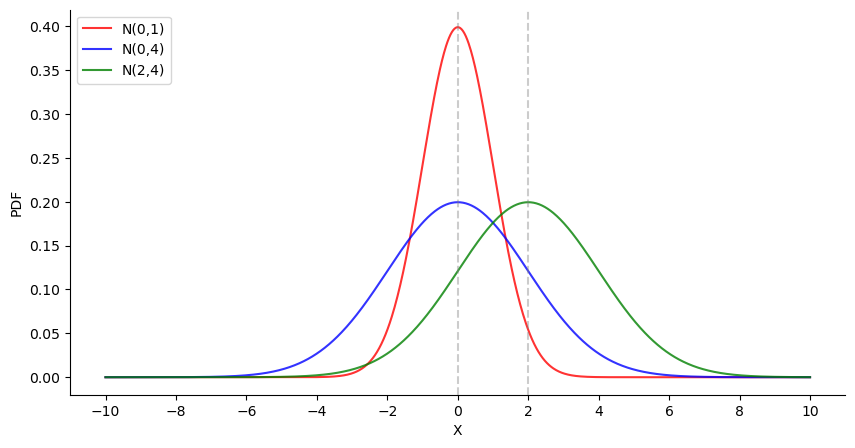

In [3]:
x_range = np.linspace(-10, 10, num=1000)

pdf1 = stats.norm.pdf(x_range, loc=0, scale=1)
pdf2 = stats.norm.pdf(x_range, loc=0, scale=2)
pdf3 = stats.norm.pdf(x_range, loc=2, scale=2)

# Line plot
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x_range, pdf1, linestyle='-', color='red', alpha=0.8, label='N(0,1)')
ax.plot(x_range, pdf2, linestyle='-', color='blue', alpha=0.8, label='N(0,4)')
ax.plot(x_range, pdf3, linestyle='-', color='green', alpha=0.8, label='N(2,4)')

plt.axvline(x=0, linestyle='--', color='gray', alpha=0.4)    # add vertical dashed lines repesenting mean values
plt.axvline(x=2, linestyle='--', color='gray', alpha=0.4)

ax.set_xlabel('X')
ax.set_ylabel('PDF')

plt.xticks(range(-10, 11, 2))

ax.legend(loc='upper left', ncols=1)    # create a legend

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Cumulative Distribution Function
We're going to plot the CDF of a discrete random variable $X \sim Binomial(15, 0.4)$. It's like doing a sequence of 15 independent experiments, each with success probability of 0.4.

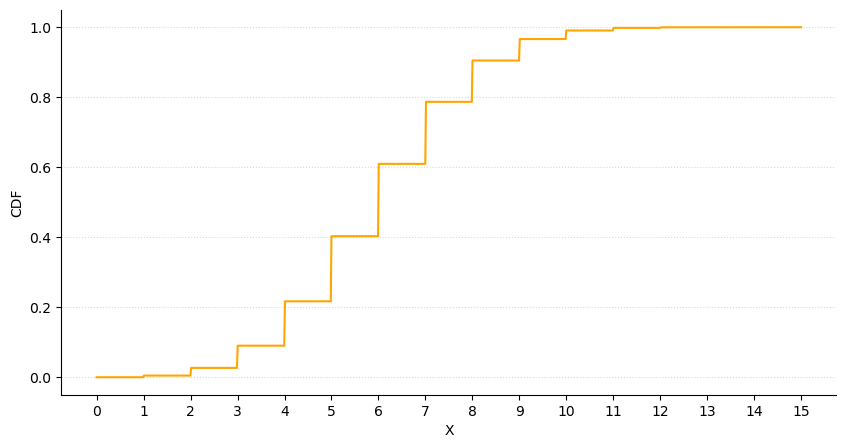

In [4]:
x_range = np.linspace(0, 15, num=1000)

cdf = stats.binom.cdf(x_range, 15, 0.4)

# Bar plot
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(x_range, cdf, linestyle='-', color='orange')

ax.grid(axis='y', linestyle='dotted', color='gray', alpha=0.3)    # add grid lines

ax.set_xlabel('X')
ax.set_ylabel('CDF')

plt.xticks(range(0, 16))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Empirical Distribution
I will take a sample from a random variable $X \sim N(0, 4)$ and then use this sample to plot the empirical PDF and empirical CDF of $X$.

In [5]:
np.random.seed(230721)

# Random draws
sample = stats.norm.rvs(loc=0, scale=2, size=10000)
sample_sort = np.sort(sample)    # without sorting, the line plot would be messy

# Estimate the univariate kernel density
kden = sm.nonparametric.KDEUnivariate(sample_sort)
kden.fit()

# True distribution
pdf = stats.norm.pdf(sample_sort, loc=0, scale=2)

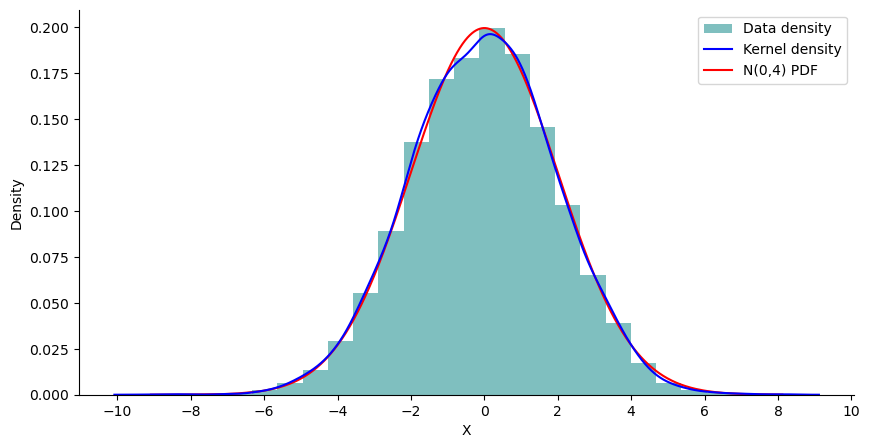

In [6]:
# Histogram for density
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(sample_sort, bins=25, color='teal', alpha=0.5, density=True, label='Data density')
ax.plot(sample_sort, pdf, linestyle='-', color='red', label='N(0,4) PDF')
ax.plot(kden.support, kden.density, linestyle='-' , color='blue', linewidth=1.5, label='Kernel density')

ax.set_xlabel('X')
ax.set_ylabel('Density')

plt.xticks(range(-10, 11, 2))

handles, labels = plt.gca().get_legend_handles_labels()    #get handles and labels
order = [0, 2, 1]    #specify order of items in legend
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='upper right', ncols=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('..\\Figures\\Empirical_PDF.pdf', bbox_inches='tight')    # two dots (..) tell Python to save the figure in a level-up folder

In [7]:
# Empirical CDF
N = sample_sort.size
ecdf = np.arange(1, N+1)/N    # the arange method includes start but excludes stop

# True CDF
cdf = stats.norm.cdf(sample_sort, loc=0, scale=2)

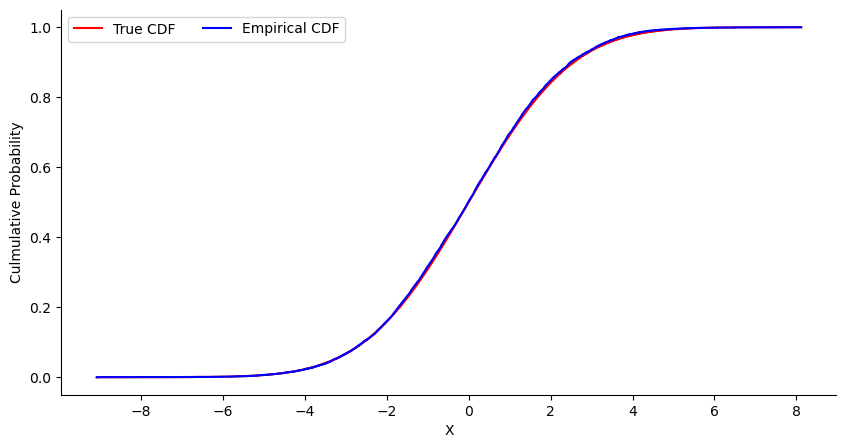

In [8]:
# Plot
fig, ax = plt.subplots(figsize=(10,5))

ax.step(sample_sort, cdf, linestyle='-', color='red', label='True CDF')
ax.step(sample_sort, ecdf, linestyle='-', color='blue', label='Empirical CDF')

ax.set_xlabel('X')
ax.set_ylabel('Culmulative Probability')

plt.xticks(range(-8, 9, 2))

ax.legend(loc='upper left', ncols=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)